In [ ]:
#Ejercicio. Pronóstico de Series de Tiempo con Redes Neuronales (Para predecir la TRM)

import csv
import pandas as pd
import matplotlib.pyplot as plt

# Ruta a tu archivo de etiquetas
archivo_csv = ""

# Leer el archivo CSV en un DataFrame especificando el delimitador
df = pd.read_csv(archivo_csv, delimiter=';', decimal=',')

# Asegurar que la columna 'Fecha' esté en formato datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)
df = df.drop(columns=[';'])
# Eliminar espacios en los nombres de las columnas si es necesario
df.columns = df.columns.str.strip()
# Reemplazar comas por puntos y convertir a float
# Eliminar los puntos de los miles y reemplazar comas por puntos decimales
df['TRM'] = df['TRM'].str.replace('.', '', regex=False).str.replace(',', '.').astype(float)

# Verificar resultados
print(df.head())
print("columnas", df.columns)
print("tipo", df.dtypes)  # Verifica el tipo de datos de la columna 'TRM'

       Fecha      TRM
0 2024-08-14  4038.87
1 2024-08-13  4063.26
2 2024-08-12  4064.51
3 2024-08-11  4064.51
4 2024-08-10  4064.51
columnas Index(['Fecha', 'TRM'], dtype='object')
tipo Fecha    datetime64[ns]
TRM             float64
dtype: object


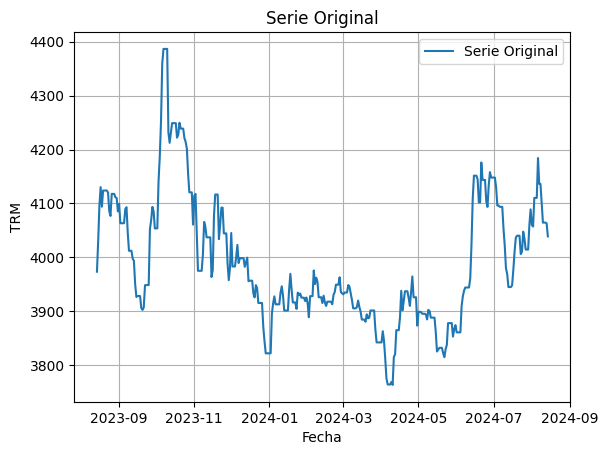

In [ ]:
# Gráfica de la serie original
plt.plot(df['Fecha'], df['TRM'], label='Serie Original')
plt.title('Serie Original')
plt.xlabel('Fecha')
plt.ylabel('TRM')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Descomposición de la serie de tiempo

import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Como se tiene el DataFrame df con las columnas 'Fecha' y 'TRM'

# Configurar la columna 'Fecha' como índice
df.set_index('Fecha', inplace=True)

# Asegurarse de que el índice sea un DatetimeIndex
if not isinstance(df.index, pd.DatetimeIndex):
    raise ValueError("El índice del DataFrame debe ser un DatetimeIndex.")

#Nota: Después de establecer la columna 'Fecha' como índice, no estará disponible
#como una columna en el DataFrame df. Por tanto, debe volverse a ejecutar todo el código
#porque, cuando se intenta acceder a df['Fecha'],
#se produce un KeyError porque la columna 'Fecha' no existe en el DataFrame.

# Establecer la frecuencia del índice si es necesario
df = df.asfreq('D')  # 'D' para datos diarios, ajusta si es diferente (por ejemplo, 'W' para semanal, 'M' para mensual)

# Seleccionar la serie de tiempo
ts = df['TRM']

In [ ]:
#1 Preprocesamiento de datos

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

#Dividir los datos de entrenamiento y prueba
train_data, test_data = train_test_split(ts, test_size=0.3, shuffle=False)
print("train data", train_data)
print("test data", test_data)

train data Fecha
2023-08-14    3973.41
2023-08-15    4029.95
2023-08-16    4096.08
2023-08-17    4130.33
2023-08-18    4093.96
               ...   
2024-04-21    3937.13
2024-04-22    3937.13
2024-04-23    3924.82
2024-04-24    3910.01
2024-04-25    3935.65
Freq: D, Name: TRM, Length: 256, dtype: float64
test data Fecha
2024-04-26    3964.59
2024-04-27    3926.02
2024-04-28    3926.02
2024-04-29    3926.02
2024-04-30    3873.44
               ...   
2024-08-10    4064.51
2024-08-11    4064.51
2024-08-12    4064.51
2024-08-13    4063.26
2024-08-14    4038.87
Freq: D, Name: TRM, Length: 111, dtype: float64


In [ ]:
# Paso 2: Preparación de datos (ejemplo básico)
# Por ejemplo, transformamos nuestros datos en secuencias
def create_dataset(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

#Definimos el número de pasos de tiempo para la serie temporal
seq_length = 16

#Creamos las secuencias de entrenamiento y prueba en formato 3D
X_train, y_train = create_dataset(train_data, seq_length)
X_test, y_test = create_dataset(test_data, seq_length)

#Imprimimos los conjutos de datos en formato 3D
#print("Conjunto de secuencias de entrenamiento X_train:\n", X_train)
#print("Etiquetas de entrenamiento y_train:\n", y_train)
#print("Conjunto de secuencias de prueba X_test:\n", X_test)
#print("Etiquetas de prueba y_test:\n", y_test)

<ipython-input-26-efcbf7b1877d>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(data[i+sequence_length])


In [ ]:
#3 Contrucción del modelo
model = Sequential()
model.add(LSTM(32,
               activation='relu',
               input_shape=(seq_length, 1),
               return_sequences=True))
model.add(LSTM(32, activation='relu'))
model.add(Dense(1))
model.summary()

#4 Compilación del modelo
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 16, 32)              │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,705 (49.63 KB)

 Trainable params: 12,705 (49.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 13366705.0000
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11763915.0000
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11380667.0000
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9161740.0000
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5672437.0000
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4694086.0000
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2957926.5000
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1981674.8750
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 932575.7500
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 987900.6875 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 224232.5000
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 23861.0957
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 26918.2480
Epoch 14/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 32234.6777
Epoch 

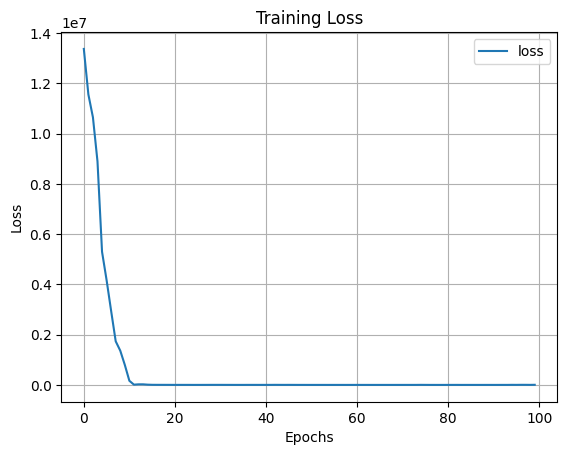

In [ ]:
# Paso 5: Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=100)

# Graficar el historial de entrenamiento:
pd.DataFrame(history.history).plot(grid=True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [ ]:
#Paso 6: Evaluación del modelo
Evaluación = model.evaluate(X_test, y_test)
print("Evaluación del modelo:", Evaluación)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13230.0576 
Evaluación del modelo: 15178.0537109375


Predicción del modelo X_test:
 [[3964.59 3926.02 3926.02 ... 3902.63 3900.38 3888.21]
 [3926.02 3926.02 3926.02 ... 3900.38 3888.21 3888.21]
 [3926.02 3926.02 3873.44 ... 3888.21 3888.21 3888.21]
 ...
 [4014.56 4014.56 4014.56 ... 4100.79 4064.51 4064.51]
 [4014.56 4014.56 4059.91 ... 4064.51 4064.51 4064.51]
 [4014.56 4059.91 4089.05 ... 4064.51 4064.51 4063.26]]
Etiquetas reales y_test:
 [3888.21 3888.21 3888.21 3861.82 3825.42 3828.98 3832.26 3832.26 3832.26
 3822.39 3814.94 3829.59 3837.58 3878.07 3878.07 3878.07 3878.07 3853.09
 3867.02 3874.32 3860.92 3860.92 3860.92 3860.92 3909.65 3927.91 3938.53
 3944.14 3944.14 3944.14 3944.14 3960.83 4023.26 4107.52 4151.55 4151.55
 4151.55 4144.63 4101.87 4101.87 4175.96 4143.72 4143.72 4143.72 4104.38
 4093.66 4133.61 4158.1  4148.04 4148.04 4148.04 4148.04 4130.03 4096.09
 4096.09 4093.72 4093.72 4093.72 4052.99 4022.05 3979.91 3968.87 3944.97
 3944.97 3944.97 3948.41 3977.63 4011.19 4036.73 4040.2  4040.2  4040.2
 4006.01 4010.53 4047.66

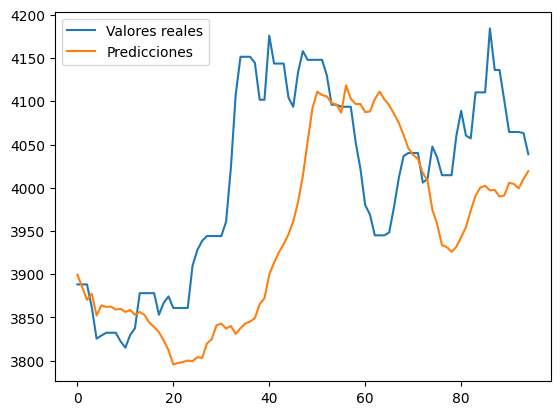

In [ ]:
# Paso 7: Predicción
print("Predicción del modelo X_test:\n", X_test)
print("Etiquetas reales y_test:\n", y_test)
y_pred = model.predict(X_test)
print("Predicciones del modelo:\n", y_pred)
plt.plot(y_test, label='Valores reales')
plt.plot(y_pred, label='Predicciones')
plt.legend()
plt.show()

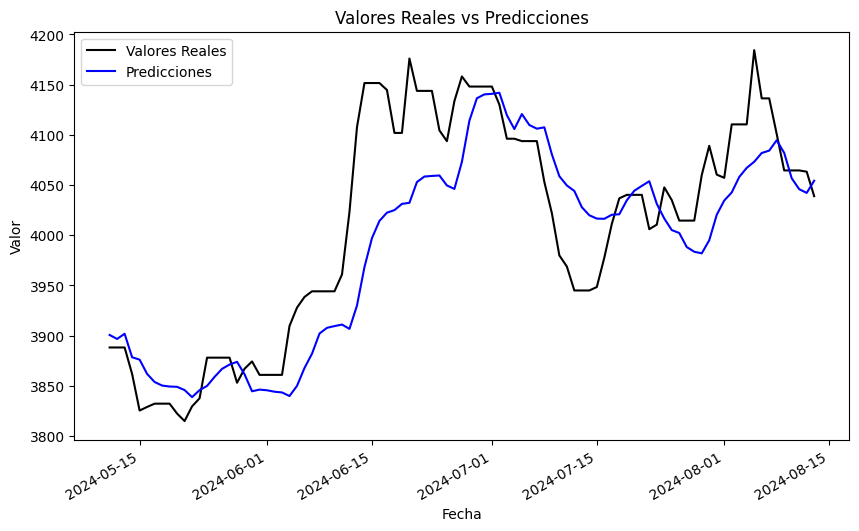

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Crear un rango de fechas correspondiente al tamaño de y_test
# Suponiendo que tus datos son diarios, ajusta la frecuencia 'D' si es necesario
start_date = '2024-05-11'  # Ajusta esta fecha de inicio según sea necesario
dates = pd.date_range(start=start_date, periods=len(y_test), freq='D')

# Convertir y_test y y_pred a pandas.Series con el índice de fechas
y_test_series = pd.Series(y_test, index=dates)
y_pred_series = pd.Series(y_pred.flatten(), index=dates)

# Graficar los valores reales y las predicciones con las fechas en el eje x
plt.figure(figsize=(10, 6))
plt.plot(y_test_series.index, y_test_series, label='Valores Reales', color='black')
plt.plot(y_pred_series.index, y_pred_series, label='Predicciones', color='blue')
plt.legend()

# Formatear las fechas en el eje x para que se vean mejor
plt.gcf().autofmt_xdate()

# Añadir títulos y etiquetas
plt.title('Valores Reales vs Predicciones')
plt.xlabel('Fecha')
plt.ylabel('Valor')

# Mostrar la gráfica
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


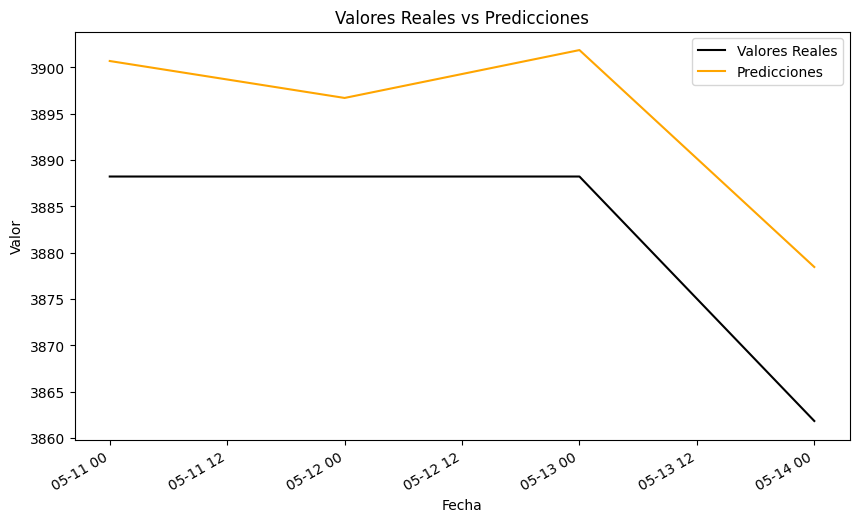

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Crear un rango comenzando desde una fecha para abarcar el rango deseado
dates = pd.date_range(start='2024-05-11', periods=len(y_test), freq='D')

# Convertir y_test a pandas.Series con el índice de fechas
y_test_series = pd.Series(y_test, index=dates)

# Calcular los márgenes superior e inferior
y_pred = model.predict(X_test).flatten()


# Filtrar las fechas para mostrar solo 3 días antes y 3 días después
start_date = '2024-05-08'
end_date = '2024-05-14'
filtered_y_test_series = y_test_series[start_date:end_date]

# Convertir las diferencias de fechas en enteros (número de días)
start_index = (filtered_y_test_series.index[0] - dates[0]).days
end_index = (filtered_y_test_series.index[-1] - dates[0]).days + 1

# Aplicar los índices calculados para obtener las predicciones correspondientes
filtered_y_pred = y_pred[start_index:end_index]

# Graficar los valores reales y las predicciones con sus márgenes solo para el rango filtrado
plt.figure(figsize=(10, 6))
plt.plot(filtered_y_test_series.index, filtered_y_test_series, label='Valores Reales', color='black')
plt.plot(filtered_y_test_series.index, filtered_y_pred, label='Predicciones', color='orange')

# Añadir títulos y leyenda
plt.title('Valores Reales vs Predicciones')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()

# Formatear las fechas en el eje x para que se vean mejor
plt.gcf().autofmt_xdate()

# Mostrar la gráfica
plt.show()

Predicción del modelo X_test:
 [[[3964.59]
  [3926.02]
  [3926.02]
  ...
  [3902.63]
  [3900.38]
  [3888.21]]

 [[3926.02]
  [3926.02]
  [3926.02]
  ...
  [3900.38]
  [3888.21]
  [3888.21]]

 [[3926.02]
  [3926.02]
  [3873.44]
  ...
  [3888.21]
  [3888.21]
  [3888.21]]

 ...

 [[4014.56]
  [4014.56]
  [4014.56]
  ...
  [4100.79]
  [4064.51]
  [4064.51]]

 [[4014.56]
  [4014.56]
  [4059.91]
  ...
  [4064.51]
  [4064.51]
  [4064.51]]

 [[4014.56]
  [4059.91]
  [4089.05]
  ...
  [4064.51]
  [4064.51]
  [4063.26]]]
Etiquetas reales y_test:
 [3888.21 3888.21 3888.21 3861.82 3825.42 3828.98 3832.26 3832.26 3832.26
 3822.39 3814.94 3829.59 3837.58 3878.07 3878.07 3878.07 3878.07 3853.09
 3867.02 3874.32 3860.92 3860.92 3860.92 3860.92 3909.65 3927.91 3938.53
 3944.14 3944.14 3944.14 3944.14 3960.83 4023.26 4107.52 4151.55 4151.55
 4151.55 4144.63 4101.87 4101.87 4175.96 4143.72 4143.72 4143.72 4104.38
 4093.66 4133.61 4158.1  4148.04 4148.04 4148.04 4148.04 4130.03 4096.09
 4096.09 4093.72 40

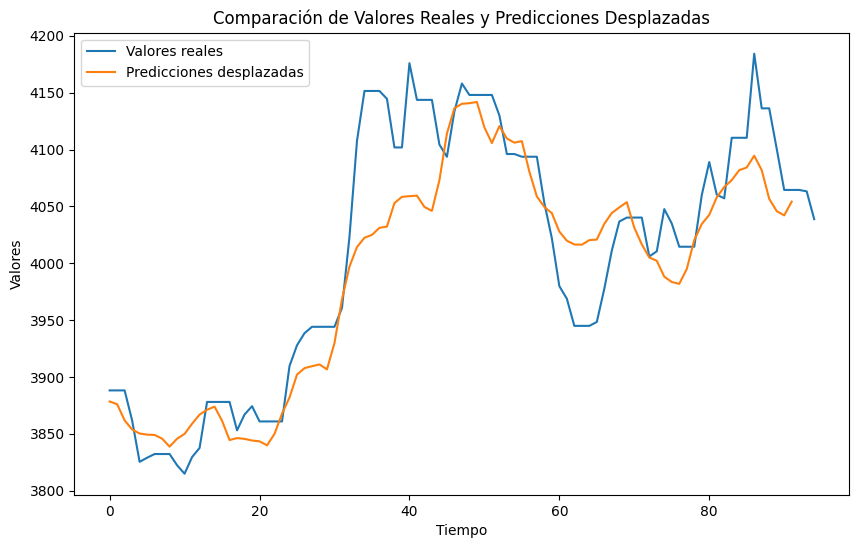

In [ ]:
#Ajustando el pronóstico porque se mantiene la tendencia
import numpy as np
import matplotlib.pyplot as plt

# Paso 7: Predicción
print("Predicción del modelo X_test:\n", X_test)
print("Etiquetas reales y_test:\n", y_test)
y_pred = model.predict(X_test)
print("Predicciones del modelo:\n", y_pred)

# Desplazar las predicciones 3 puntos a la izquierda
shift = 3
shifted_y_pred = y_pred.flatten()[shift:]  # Recortar los primeros 10 valores

# Añadir NaN al final para mantener la longitud original
shifted_y_pred = np.concatenate([shifted_y_pred, np.full(shift, np.nan)])

# Ajustar la longitud de y_test para que coincida con shifted_y_pred
if len(shifted_y_pred) > len(y_test):
    shifted_y_pred = shifted_y_pred[:len(y_test)]
else:
    y_test = y_test[:len(shifted_y_pred)]

# Graficar los valores reales y las predicciones desplazadas
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Valores reales')
plt.plot(shifted_y_pred, label='Predicciones desplazadas')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Valores')
plt.title('Comparación de Valores Reales y Predicciones Desplazadas')
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step
LSTM MSE: 12696.552734375
SimpleRNN MSE: 2246.408935546875
GRU MSE: 3688.33154296875
El mejor modelo es: SimpleRNN con un MSE de 2246.408935546875


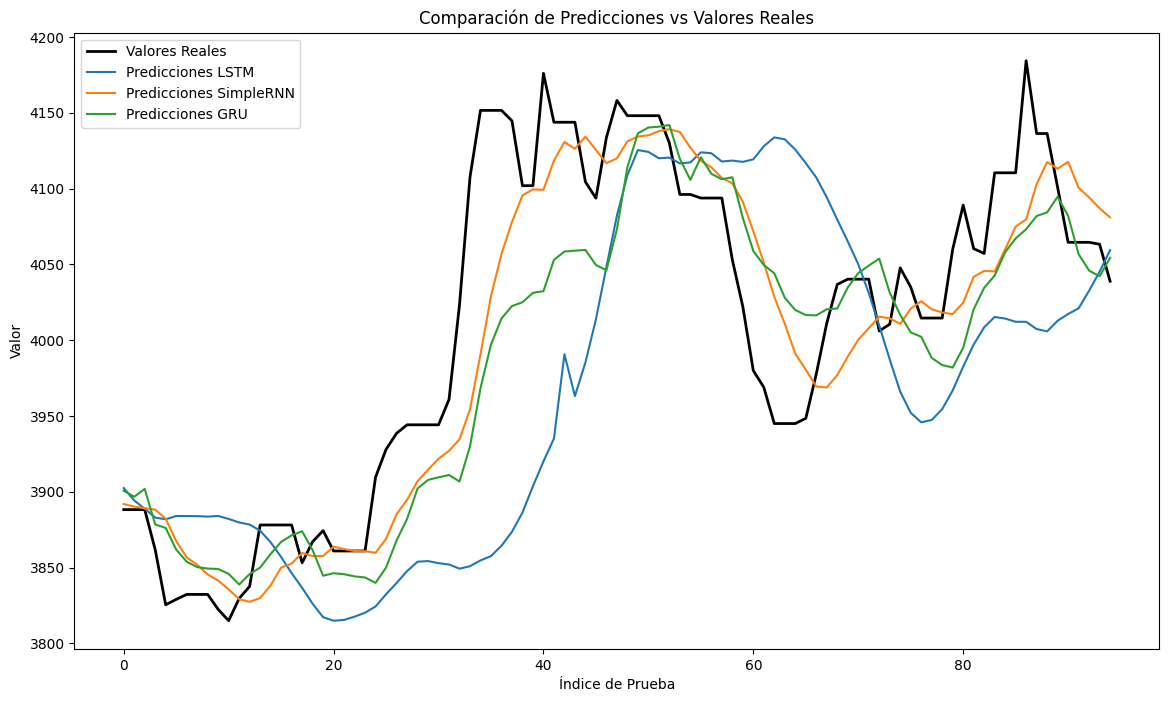

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, GRU, Dense
from sklearn.metrics import mean_squared_error
import pandas as pd

# Como se tienen los datos preparados en X_train, X_test, y_train, y_test
# Asegurando de que X_train y X_test tengan la forma correcta
if len(X_train.shape) == 2:
    # Reshape si es necesario, asumiendo que quieres usar toda la secuencia como un único timestep
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


# Función para crear y entrenar un modelo
def create_and_train_model(model_type, input_shape):
    model = Sequential()
    if model_type == 'LSTM':
        model.add(LSTM(32, activation='relu', input_shape=input_shape, return_sequences=True))
        model.add(LSTM(32, activation='relu'))
    elif model_type == 'SimpleRNN':
        model.add(SimpleRNN(32, activation='relu', input_shape=input_shape, return_sequences=True))
        model.add(SimpleRNN(32, activation='relu'))
    elif model_type == 'GRU':
        model.add(GRU(32, activation='relu', input_shape=input_shape, return_sequences=True))
        model.add(GRU(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=50, verbose=0)
    return model

# Crear y entrenar los modelos
input_shape = (X_train.shape[1], 1)
models = {
    'LSTM': create_and_train_model('LSTM', input_shape),
    'SimpleRNN': create_and_train_model('SimpleRNN', input_shape),
    'GRU': create_and_train_model('GRU', input_shape)
}

# Evaluar los modelos
mse_scores = {}
predictions = {}

for model_name, model in models.items():
    mse = model.evaluate(X_test, y_test, verbose=0)
    mse_scores[model_name] = mse
    predictions[model_name] = model.predict(X_test)

# Mostrar los MSEs
for model_name, mse in mse_scores.items():
    print(f"{model_name} MSE: {mse}")

# Determinar el mejor modelo
best_model = min(mse_scores, key=mse_scores.get)
print(f"El mejor modelo es: {best_model} con un MSE de {mse_scores[best_model]}")

# Graficar las predicciones vs los valores reales para cada modelo
plt.figure(figsize=(14, 8))
plt.plot(y_test, label='Valores Reales', color='black', linewidth=2)

for model_name, y_pred in predictions.items():
    plt.plot(y_pred, label=f'Predicciones {model_name}')

plt.title('Comparación de Predicciones vs Valores Reales')
plt.xlabel('Índice de Prueba')
plt.ylabel('Valor')
plt.legend()
plt.show()

#Conclusión

El mejor modelo tiene el MSE más bajo, lo que indica que sus predicciones están, en promedio, más cerca de los valores reales que las predicciones de los otros modelos. El modelo puede variar de acuerdo con los datos y las corridas.

LSTM Desviación Estándar del Error de Predicción: 104.96196457825026
SimpleRNN Desviación Estándar del Error de Predicción: 46.22970928572641
GRU Desviación Estándar del Error de Predicción: 56.77656602664746


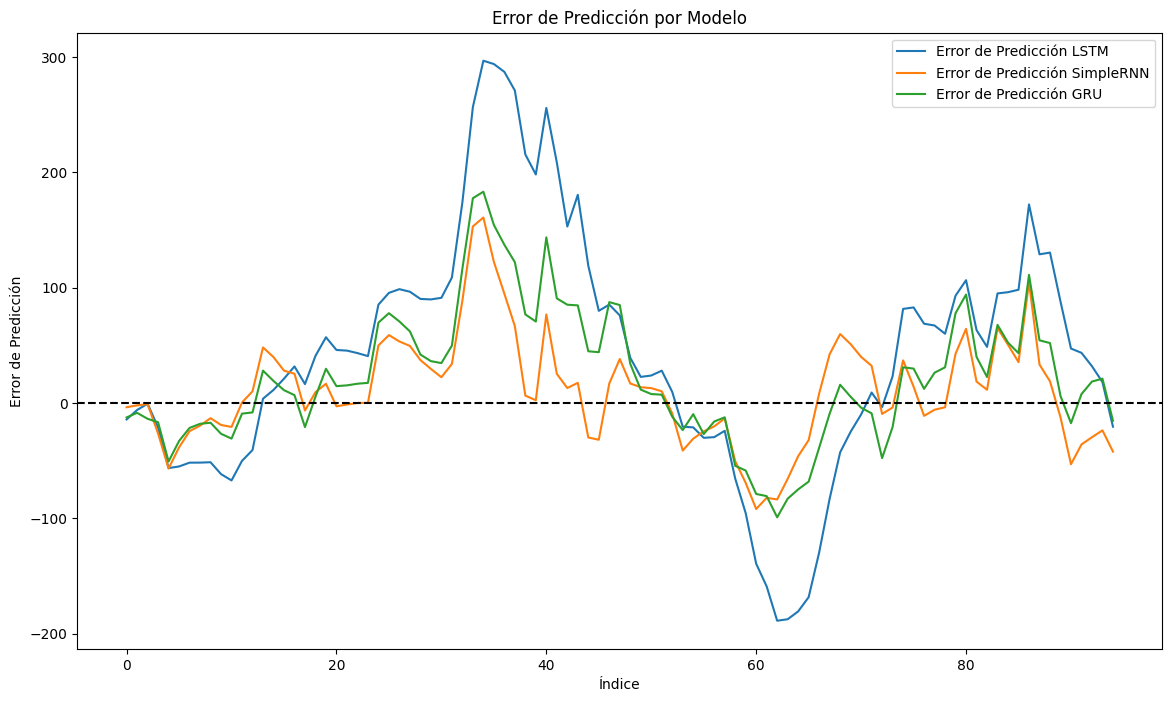

In [ ]:
#Cálcula el error para cada modelo y luego los gráfica

import matplotlib.pyplot as plt
import numpy as np

# Calcular el error de predicción y la desviación estándar para cada modelo
prediction_errors = {}
std_devs = {}

for model_name, y_pred in predictions.items():
    error = y_test - y_pred.flatten()  # Restar las predicciones de los valores reales
    prediction_errors[model_name] = error
    std_devs[model_name] = np.std(error)  # Calcular la desviación estándar

# Mostrar la desviación estándar de los errores de predicción
for model_name, std_dev in std_devs.items():
    print(f"{model_name} Desviación Estándar del Error de Predicción: {std_dev}")

# Generar un rango de índices para la gráfica
indices = np.arange(len(y_test))

# Graficar el error de predicción en cada fecha para cada modelo
plt.figure(figsize=(14, 8))

# Graficar los errores como líneas
for model_name, errors in prediction_errors.items():
    plt.plot(indices, errors, label=f'Error de Predicción {model_name}')

plt.axhline(y=0, color='black', linestyle='--')  # Línea horizontal en y=0 para referencia
plt.title('Error de Predicción por Modelo')
plt.xlabel('Índice')
plt.ylabel('Error de Predicción')
plt.legend()
plt.show()